In [2]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip "/content/drive/My Drive/dataset/covid19-xray.zip" -d "/content/drive/My Drive/dataset/covid19/"

In [4]:
import os, re, glob, cv2, numpy as np

path = os.path.abspath('Covid19.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir('/content/drive/My Drive/dataset/covid19/covid19-xray/') #list directory in Land Use Images folder
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/dataset/covid19/covid19-xray/'+i+'/*'):
        im = cv2.imread(pic) #open image
        im = cv2.resize(im,(70,70))
        im = np.array(im) #change into array
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10): #SAmple
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah covid : 41
Jumlah normal : 41


In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 7, figsize=(20, 10))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==7):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()

In [0]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 2) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 2) #change label to binary / categorical

Using TensorFlow backend.


In [0]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(2, activation='softmax')) #softmax works






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# COMPILE
from keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)            

In [0]:
#TRAINING
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54 samples, validate on 28 samples
Epoch 1/25





54/54 [==============================] - 1s 20ms/step - loss: 0.8907 - acc: 0.3519 - val_loss: 0.7143 - val_acc: 0.4643
Epoch 2/25
54/54 [==============================] - 0s 7ms/step - loss: 0.6909 - acc: 0.5556 - val_loss: 0.6831 - val_acc: 0.4643
Epoch 3/25
54/54 [==============================] - 0s 6ms/step - loss: 0.7354 - acc: 0.5000 - val_loss: 0.6462 - val_acc: 0.5357
Epoch 4/25
54/54 [==============================] - 0s 6ms/step - loss: 0.7679 - acc: 0.5185 - val_loss: 0.6393 - val_acc: 0.8214
Epoch 5/25
54/54 [==============================] - 0s 6ms/step - loss: 0.6032 - acc: 0.6667 - val_loss: 0.6453 - val_acc: 0.5000
Epoch 6/25
54/54 [==============================] - 0s 6ms/step - loss: 0.6449 - acc: 0.6111 - val_loss: 0.5937 - val_acc: 0.8214
Epoch 7/25
54/54 [==============================] - 0s 6ms/step - loss: 0

In [0]:
#PREDIKSI
y_pred = model.predict(X_test)

In [0]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [0]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID","NORMAL"]))

              precision    recall  f1-score   support

       COVID       1.00      0.93      0.97        15
      NORMAL       0.93      1.00      0.96        13

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [0]:
y_pred = model.predict_classes(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1])

In [0]:
y_test_class = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9642857142857143


array([[14,  1],
       [ 0, 13]])

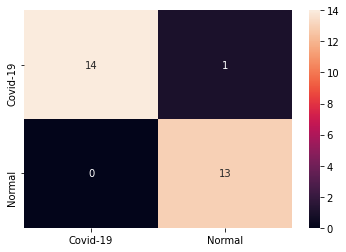

In [0]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["Covid-19","Normal"], yticklabels=["Covid-19","Normal"])